In [1]:
import time, h5py, sys, numpy as np
import pandas as pd, glob
from pycbc import conversions

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [3]:
files = glob.glob('result/match*.csv')

In [4]:
result = None
for f in files:
    df = pd.read_csv(f, index_col=0)
    if result is None:
        result = df
    else:
        result = pd.concat([result,df])

In [5]:
result

injmc   injspin     lambda1     lambda2     mass1     mass2    spin1z  \
0   1.635144 -0.723098    0.000000    0.000000  1.077754  3.505188 -0.042228   
1   1.337554 -0.248562    0.000000    0.000000  1.102050  2.194794  0.042503   
2   1.512009 -0.743820    0.000000    0.000000  1.053406  3.026597  0.004705   
3   1.092127 -0.910330   15.160710   26.417718  1.029319  1.561993 -0.024734   
4   1.524997  0.710014    0.000000    0.000000  1.091265  2.949298  0.011822   
..       ...       ...         ...         ...       ...       ...       ...   
95  1.016904 -0.193042  188.501643  150.116777  1.014762  1.355308 -0.043130   
96  1.040100  0.227081   29.627911   66.626547  1.197025  1.186858  0.041513   
97  1.575387  0.074941    0.000000    0.000000  1.047476  3.340368  0.020753   
98  1.269663  0.312204    0.000000    0.000000  1.059381  2.052503  0.029449   
99  1.650685  0.681195    0.000000    0.000000  1.099768  3.484995  0.008883   

      spin2z  max_match  
0  -0.447685   0.979849  
1  -0.221848   0.988780  
2  -0.570161   0.992181  
3  -0.045493   0.227627  
4   0.912686   0.988109  
..       ...        ...  
95 -0.043185   0.714285  
96  0.048977   0.677270  
97  0.312951   0.984067  
98  0.497876   0.989809  
99  0.867684   0.973384  

[10000 rows x 9 columns]

In [7]:
result

injmc   injspin     lambda1     lambda2     mass1     mass2    spin1z  \
0   1.635144 -0.723098    0.000000    0.000000  1.077754  3.505188 -0.042228   
1   1.337554 -0.248562    0.000000    0.000000  1.102050  2.194794  0.042503   
2   1.512009 -0.743820    0.000000    0.000000  1.053406  3.026597  0.004705   
3   1.092127 -0.910330   15.160710   26.417718  1.029319  1.561993 -0.024734   
4   1.524997  0.710014    0.000000    0.000000  1.091265  2.949298  0.011822   
..       ...       ...         ...         ...       ...       ...       ...   
95  1.016904 -0.193042  188.501643  150.116777  1.014762  1.355308 -0.043130   
96  1.040100  0.227081   29.627911   66.626547  1.197025  1.186858  0.041513   
97  1.575387  0.074941    0.000000    0.000000  1.047476  3.340368  0.020753   
98  1.269663  0.312204    0.000000    0.000000  1.059381  2.052503  0.029449   
99  1.650685  0.681195    0.000000    0.000000  1.099768  3.484995  0.008883   

      spin2z  max_match  
0  -0.447685   0.979849  
1  -0.221848   0.988780  
2  -0.570161   0.992181  
3  -0.045493   0.227627  
4   0.912686   0.988109  
..       ...        ...  
95 -0.043185   0.714285  
96  0.048977   0.677270  
97  0.312951   0.984067  
98  0.497876   0.989809  
99  0.867684   0.973384  

[10000 rows x 9 columns]

In [14]:
t1 = result[(result['injmc']>1.3) & (result['injspin']<-0.85)]
t2 = result[(result['injmc']>1.3) & (result['injspin']>0.85)]

In [15]:
t1['mass2']/t1['mass1']

59    3.491911
45    3.834477
77    2.790911
58    2.379635
64    3.340992
        ...   
94    2.405044
65    2.618840
82    2.299491
23    2.348183
83    3.031059
Length: 237, dtype: float64

(array([23., 28., 32., 30., 29., 33., 27., 27., 28., 15.]),
 array([2.15692194, 2.37977795, 2.60263395, 2.82548996, 3.04834597,
        3.27120197, 3.49405798, 3.71691398, 3.93976999, 4.16262599,
        4.385482  ]),
 <BarContainer object of 10 artists>)

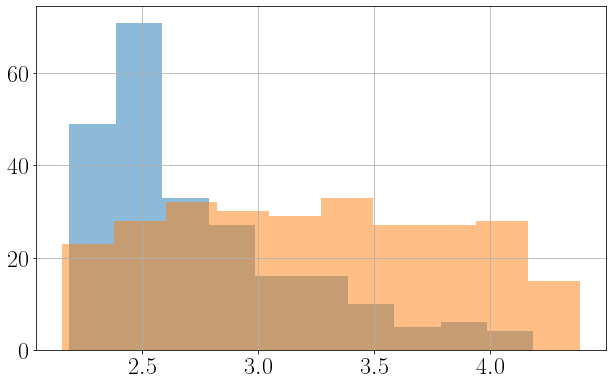

In [19]:
plt.hist(t1['mass2']/t1['mass1'],alpha=0.5)
plt.hist(t2['mass2']/t2['mass1'],alpha=0.5)

In [17]:
t2['mass2']/t2['mass1']

18    3.301680
34    4.184315
80    3.141662
55    2.688912
80    3.141831
        ...   
43    3.731410
88    4.385482
71    3.778393
47    2.300984
94    2.989553
Length: 272, dtype: float64

In [20]:
t1

injmc   injspin  lambda1  lambda2     mass1     mass2    spin1z  \
59  1.584189 -0.898359      0.0      0.0  1.012011  3.533852  0.008033   
45  1.636825 -0.919324      0.0      0.0  1.003032  3.846102  0.022320   
77  1.457339 -0.865996      0.0      0.0  1.028662  2.870903 -0.033387   
58  1.428118 -0.935246      0.0      0.0  1.083913  2.579317  0.017530   
64  1.555488 -0.888340      0.0      0.0  1.013117  3.384817  0.004244   
..       ...       ...      ...      ...       ...       ...       ...   
94  1.651984 -0.896979      0.0      0.0  1.247589  3.000506  0.025292   
65  1.458813 -0.914075      0.0      0.0  1.060009  2.775993 -0.012276   
82  1.658842 -0.913436      0.0      0.0  1.279387  2.941938 -0.039549   
23  1.638587 -0.915551      0.0      0.0  1.251414  2.938549  0.035211   
83  1.722024 -0.918340      0.0      0.0  1.171632  3.551285  0.036296   

      spin2z  max_match  
59 -0.571158   0.979684  
45 -0.534659   0.974923  
77 -0.714604   0.982539  
58 -0.945997   0.988344  
64 -0.604427   0.975915  
..       ...        ...  
94 -0.895806   0.981964  
65 -0.821183   0.982400  
82 -0.918927   0.976090  
23 -0.934612   0.974758  
83 -0.711538   0.981057  

[237 rows x 9 columns]

In [21]:
t2

injmc   injspin  lambda1  lambda2     mass1     mass2    spin1z  \
18  1.562431  0.857503      0.0      0.0  1.020909  3.370714  0.032060   
34  1.715615  0.940489      0.0      0.0  1.009107  4.222422  0.021890   
80  1.508438  0.875289      0.0      0.0  1.006800  3.163024  0.042220   
55  1.438415  0.932641      0.0      0.0  1.028558  2.765701  0.036778   
80  1.518837  0.876920      0.0      0.0  1.014467  3.187284  0.036721   
..       ...       ...      ...      ...       ...       ...       ...   
43  1.626424  0.918696      0.0      0.0  1.005718  3.752748  0.029474   
88  1.740200  0.934475      0.0      0.0  1.003263  4.399793  0.049862   
71  1.639103  0.853355      0.0      0.0  1.009281  3.813462  0.036432   
47  1.333080  0.864861      0.0      0.0  1.024144  2.356539  0.016545   
94  1.488639  0.850493      0.0      0.0  1.016220  3.038045 -0.022820   

      spin2z  max_match  
18  0.947952   0.866305  
34  0.944431   0.826622  
80  0.942785   0.804887  
55  0.947718   0.719444  
80  0.948298   0.797392  
..       ...        ...  
43  0.935661   0.803926  
88  0.948856   0.886400  
71  0.943371   0.950926  
47  0.943219   0.729204  
94  0.947826   0.815349  

[272 rows x 9 columns]

In [23]:
result['mass2'].max()

4.422367379585353

In [34]:
t2['max_match'].min()

0.6745764580132821

In [24]:
result.to_csv('combined_ff.csv')

In [35]:
mc = result['injmc'].values
mc_recover = conversions.mchirp_from_mass1_mass2(result['mass1'].values,result['mass2'].values)
chieff = result['injspin'].values
ff = result['max_match'].values
q = conversions.q_from_mass1_mass2(result['mass1'].values,result['mass2'].values)

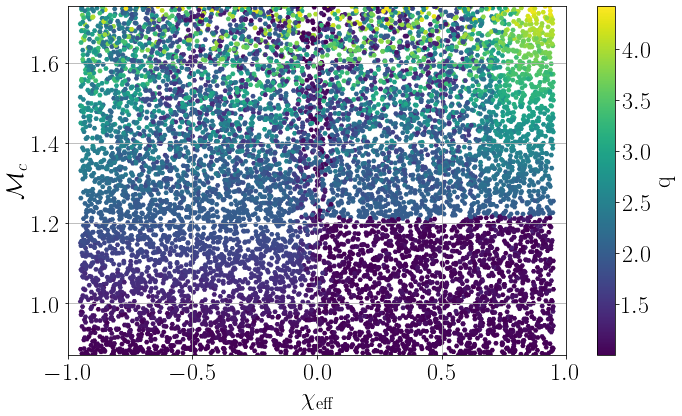

In [32]:
fig = plt.figure() 
ax = fig.add_subplot(111) 

cs = ax.scatter(chieff, mc, c=q, alpha=1,marker='H',s=28,cmap='viridis', edgecolors='None')
cbar = fig.colorbar(cs,label=r'q')

ax.set_xlabel('$\chi_\mathrm{eff}$')
ax.set_ylabel('$\mathcal{M}_c$')
ax.set_xlim(-1,1)
ax.set_ylim(1/2**0.2,2/2**0.2)
#ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout() 

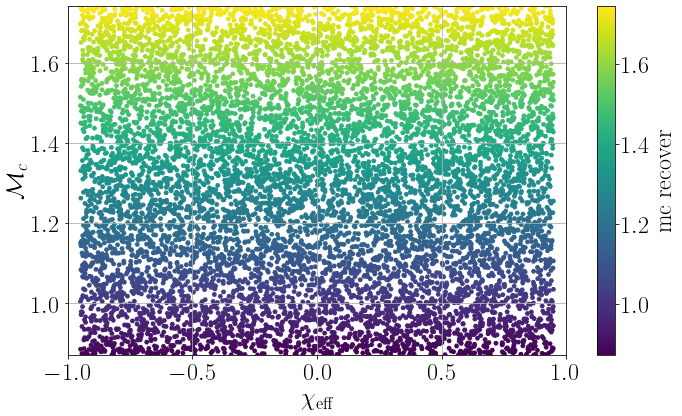

In [36]:
fig = plt.figure() 
ax = fig.add_subplot(111) 

cs = ax.scatter(chieff, mc, c=mc_recover, alpha=1,marker='H',s=28,cmap='viridis', edgecolors='None')
cbar = fig.colorbar(cs,label=r'mc recover')

ax.set_xlabel('$\chi_\mathrm{eff}$')
ax.set_ylabel('$\mathcal{M}_c$')
ax.set_xlim(-1,1)
ax.set_ylim(1/2**0.2,2/2**0.2)
#ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()

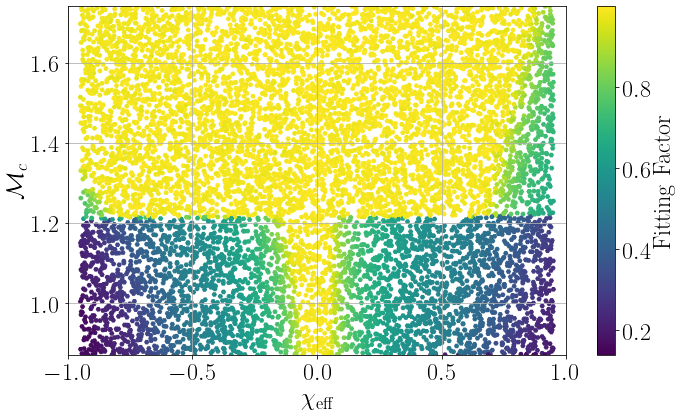

In [26]:
fig = plt.figure() 
ax = fig.add_subplot(111) 

cs = ax.scatter(chieff, mc, c=ff, alpha=1,marker='H',s=28,cmap='viridis', edgecolors='None')
cbar = fig.colorbar(cs,label=r'Fitting Factor')
'''
triang = tri.Triangulation(q, sim[:,2])
interpolator = tri.LinearTriInterpolator(triang, sim[:,3])

xi = np.linspace(1, 4,100)
yi = np.linspace(0, 0.2, 100)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

z2 = ndimage.gaussian_filter(zi, sigma=0.1, order=0)
bs = ax.contour(xi, yi, z2, levels=[0.80,0.97], linewidths=1, alpha=1,colors='black')
ax.clabel(bs,[bs.levels[0]],fmt = r'80 \%%')
ax.clabel(bs,[bs.levels[1]],fmt = r'97 \%%')


yticks = mtick.PercentFormatter(xmax=1) 
cbar.ax.yaxis.set_major_formatter(yticks) 
cbar.ax.set_ylim(np.min(sim[:,3]),1)
cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(3))
'''
ax.set_xlabel('$\chi_\mathrm{eff}$')
ax.set_ylabel('$\mathcal{M}_c$')
ax.set_xlim(-1,1)
ax.set_ylim(1/2**0.2,2/2**0.2)
#ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout() 

fig.savefig('ff.pdf')